# Data manipulation

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./phq_all_final.csv')

In [3]:
df

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9
...,...,...,...,...,...
53693,2020-07-31T13:59:13.201741,10683,gad7,2020-07-31T13:54:20.164253,1
53694,2020-07-31T15:08:56.079027,12344,gad7,2020-07-31T15:06:51.04373,1
53695,2020-07-31T15:52:50.353265,17475,gad7,2020-07-31T15:40:07.726529,7
53696,2020-07-31T17:36:57.057913,9069,gad7,2020-07-31T17:33:27.096572,3


In [4]:
df['severity'] = pd.cut(df['score'], [-0.5, 5.5, 10.5, 15.5, 21.5], labels=['Low', 'Mild', 'Moderate', 'Severe'])

In [5]:
df['further_evaluation'] = pd.cut(df['score'], [-0.5, 9.5, 21.5], labels=['no', 'yes'])

In [6]:
df['severity'].value_counts()

Low         35402
Mild        10275
Moderate     4651
Severe       3370
Name: severity, dtype: int64

In [7]:
df['further_evaluation'].value_counts()

no     44397
yes     9301
Name: further_evaluation, dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['patient_date_created'] = pd.to_datetime(df['patient_date_created'])

In [9]:
df['first_dates'] = df.groupby(['patient_id']).min()['date'][df['patient_id']].reset_index()['date']

In [10]:
df['days_since_first'] = (df['date'] - df['first_dates']).dt.days

In [11]:
df.head()

,date,patient_id,type,patient_date_created,score,severity,further_evaluation,first_dates,days_since_first
0,2019-08-26 13:32:43.019162,8430,gad7,2019-06-03 13:23:02.635680,6,Mild,no,2019-08-26 13:32:43.019162,0
1,2019-11-15 17:55:11.364877,8430,gad7,2019-06-03 13:23:02.635680,1,Low,no,2019-08-26 13:32:43.019162,81
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10,Mild,yes,2019-10-07 18:23:29.611351,0
3,2019-11-04 20:16:28.610965,14338,gad7,2019-06-03 13:32:30.668460,7,Mild,no,2019-10-07 18:23:29.611351,28
4,2019-12-02 20:56:55.966354,14338,gad7,2019-06-03 13:32:30.668460,9,Mild,no,2019-10-07 18:23:29.611351,56


# Plots

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

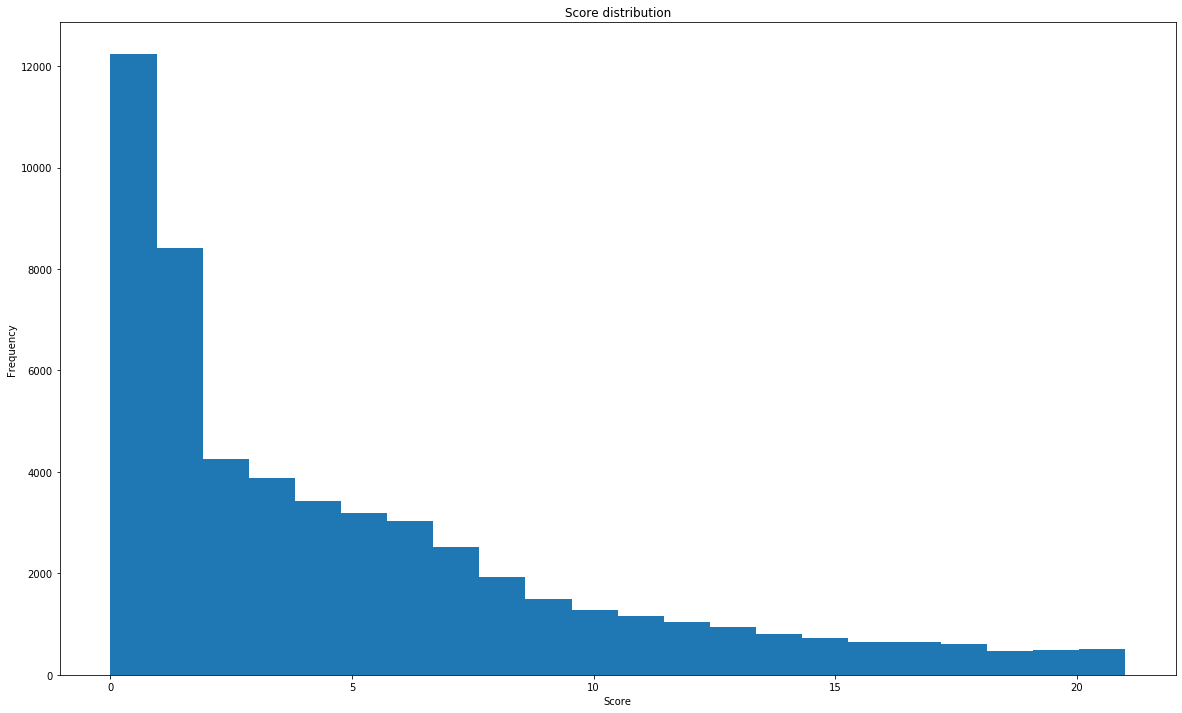

In [13]:
plt.figure(figsize=(20,12))
plt.hist(df['score'], bins=22)
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

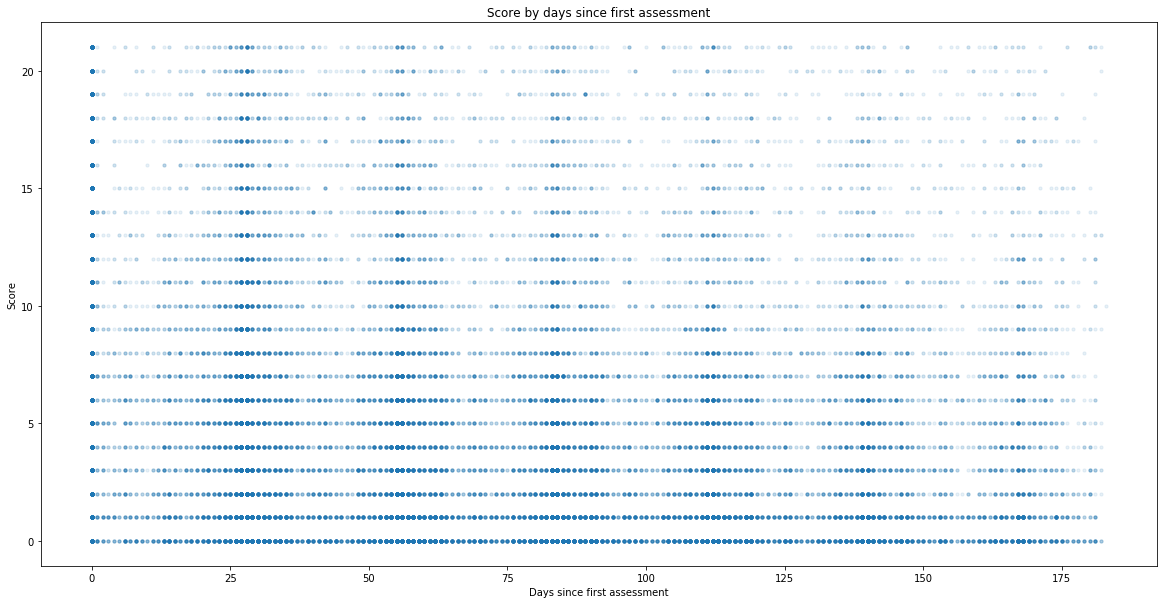

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(df['days_since_first'], df['score'], s=10, alpha=0.1)
plt.title('Score by days since first assessment')
plt.xlabel('Days since first assessment')
plt.ylabel('Score')
plt.show()

In [15]:
patient_counts = df['patient_id'].value_counts()
df_high = df[df['patient_id'].isin(patient_counts[patient_counts >= 10].index)]

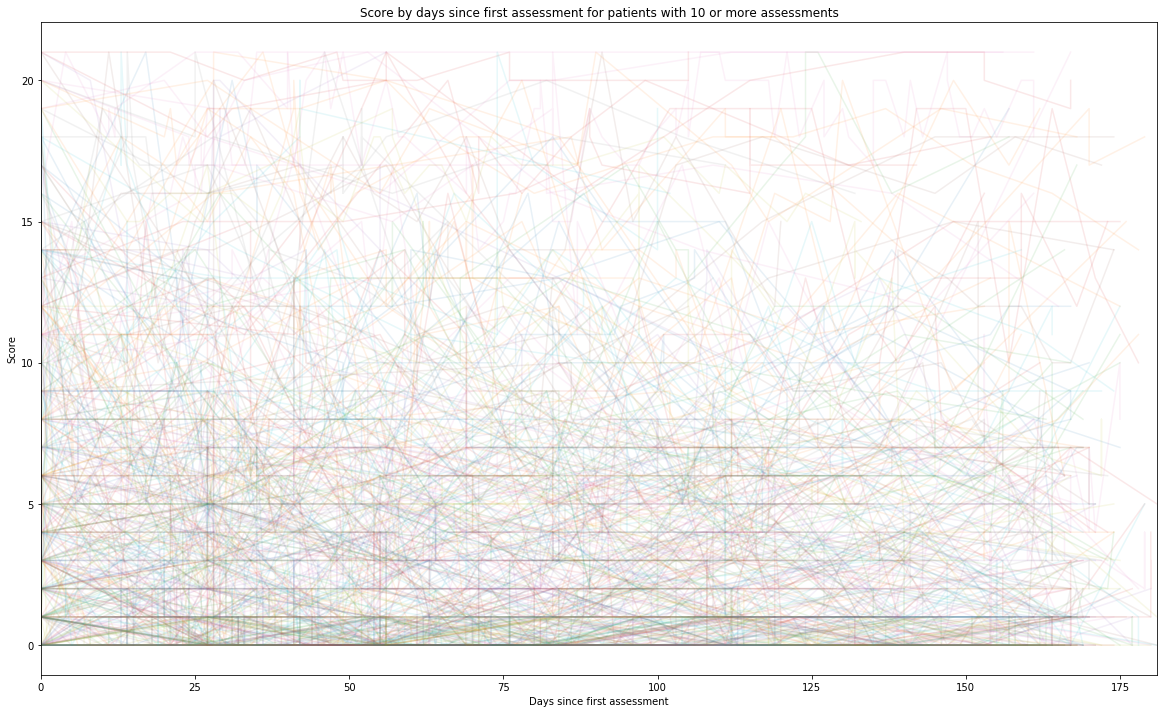

In [16]:
fig, ax = plt.subplots(figsize=(20,12))
for label, grp in df_high.groupby('patient_id'):
    grp.plot(x = 'days_since_first', y = 'score', ax = ax, label = label, legend=False, alpha=0.1)
ax.set_xlabel('Days since first assessment')
ax.set_ylabel('Score')
ax.set_title('Score by days since first assessment for patients with 10 or more assessments')
plt.show()

In [17]:
df['weeks_since_first'] = pd.cut(df['days_since_first'], list(range(-1, 190, 7)), 
                        labels=list(range(27)))
severity_by_week = df.groupby(['weeks_since_first','severity']).count()['date'].reset_index().pivot(
    index='weeks_since_first', columns='severity', values='date')
severity_by_week

severity,Low,Mild,Moderate,Severe
weeks_since_first,,,,
0,10115,3525,1805,1260
1,304,133,52,37
2,482,233,98,70
3,2395,712,288,239
4,2699,762,387,280
5,627,220,118,84
6,512,149,73,70
7,2105,511,204,145
8,2373,630,246,175


In [18]:
severity_by_week.columns = pd.Index(list(severity_by_week.columns))

severity_by_week['Total'] = severity_by_week['Low'] + severity_by_week['Mild'] + \
    severity_by_week['Moderate'] + severity_by_week['Severe']

low_fraction = severity_by_week['Low'] / severity_by_week['Total']
mild_fraction = severity_by_week['Mild'] / severity_by_week['Total']
moderate_fraction = severity_by_week['Moderate'] / severity_by_week['Total']
severe_fraction = severity_by_week['Severe'] / severity_by_week['Total']

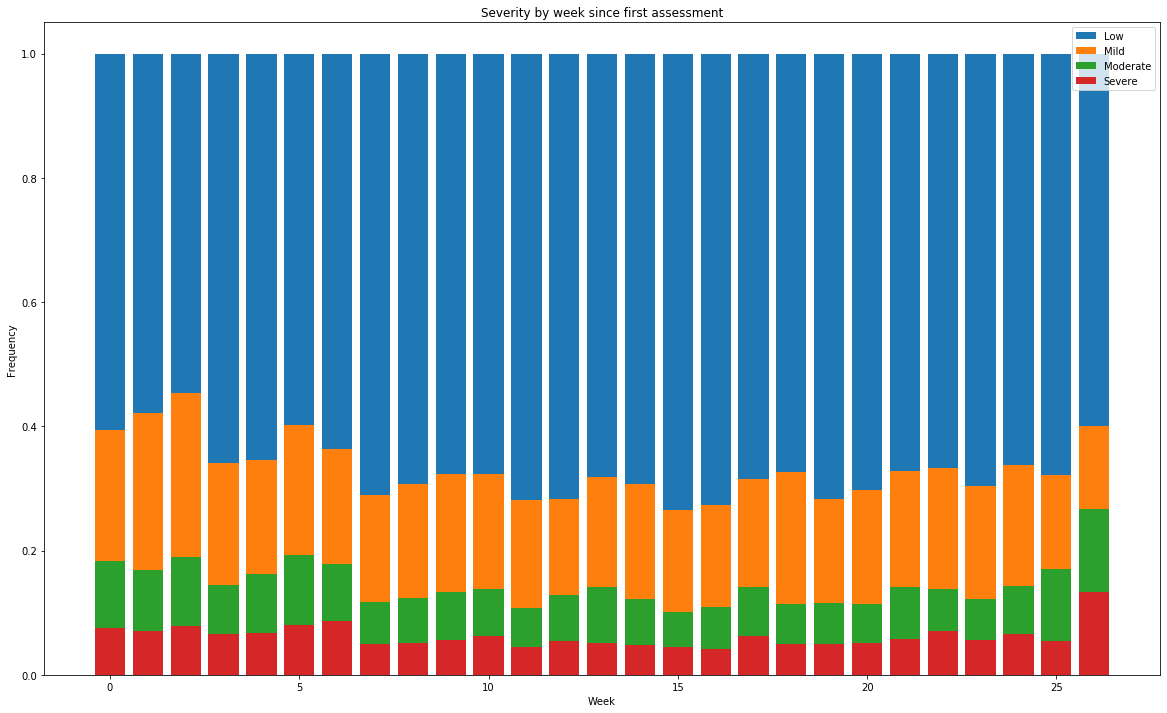

In [19]:
plt.figure(figsize=(20,12))
p1 = plt.bar(np.arange(27), severe_fraction + moderate_fraction + mild_fraction + low_fraction, label='Low')
p2 = plt.bar(np.arange(27), severe_fraction + moderate_fraction + mild_fraction, label='Mild')
p3 = plt.bar(np.arange(27), severe_fraction + moderate_fraction, label='Moderate')
p4 = plt.bar(np.arange(27), severe_fraction, label='Severe')
plt.title('Severity by week since first assessment')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
df_high['weeks_since_first'] = pd.cut(df_high['days_since_first'], list(range(-1, 190, 7)), 
                        labels=list(range(27)))
severity_by_week_high = df_high.groupby(['weeks_since_first','severity']).count()['date'].reset_index().pivot(
    index='weeks_since_first', columns='severity', values='date')
#severity_by_week_high

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
severity_by_week_high.columns = pd.Index(list(severity_by_week_high.columns))
severity_by_week_high['Total'] = severity_by_week_high['Low'] + severity_by_week_high['Mild'] + \
    severity_by_week_high['Moderate'] + severity_by_week_high['Severe']

low_fraction_high = severity_by_week_high['Low'] / severity_by_week_high['Total']
mild_fraction_high = severity_by_week_high['Mild'] / severity_by_week_high['Total']
moderate_fraction_high = severity_by_week_high['Moderate'] / severity_by_week_high['Total']
severe_fraction_high = severity_by_week_high['Severe'] / severity_by_week_high['Total']

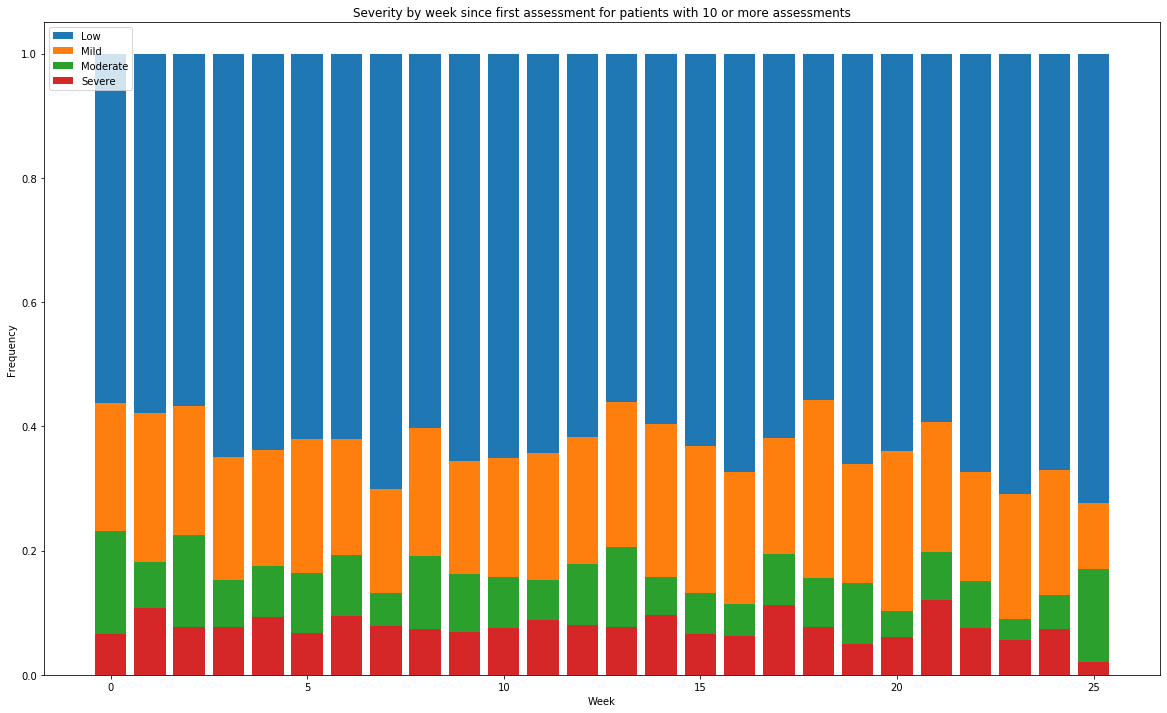

In [22]:
plt.figure(figsize=(20,12))
p1 = plt.bar(np.arange(27), severe_fraction_high + moderate_fraction_high + mild_fraction_high + low_fraction_high, label='Low')
p2 = plt.bar(np.arange(27), severe_fraction_high + moderate_fraction_high + mild_fraction_high, label='Mild')
p3 = plt.bar(np.arange(27), severe_fraction_high + moderate_fraction_high, label='Moderate')
p4 = plt.bar(np.arange(27), severe_fraction_high, label='Severe')
plt.title('Severity by week since first assessment for patients with 10 or more assessments')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()